# Assignment for week 3:

Create a notebook called assignment03-pie.ipynb

The note book should have a nice pie chart of peoples email domains in the csv file at the url
(More details in the readme file).

## Imported libraries & modules:

### [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
### [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.

 1. Import data frames, load the data set & analyse rows and inspect its structure:

In [47]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt

# Load the data set from URL
url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"
df = pd.read_csv(url)

# Let's have a look.
df

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer
...,...,...,...,...,...,...,...,...,...
995,996,fedF4c7Fd9e7cFa,Kurt,Bryant,Female,lyonsdaisy@example.net,021.775.2933,1959-01-05,Personnel officer
996,997,ECddaFEDdEc4FAB,Donna,Barry,Female,dariusbryan@example.com,001-149-710-7799x721,2001-10-06,Education administrator
997,998,2adde51d8B8979E,Cathy,Mckinney,Female,georgechan@example.org,+1-750-774-4128x33265,1918-05-13,Commercial/residential surveyor
998,999,Fb2FE369D1E171A,Jermaine,Phelps,Male,wanda04@example.net,(915)292-2254,1971-08-31,Ambulance person


In [48]:
# Get details on columns e.g. data type etc.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1000 non-null   int64 
 1   User Id        1000 non-null   object
 2   First Name     1000 non-null   object
 3   Last Name      1000 non-null   object
 4   Sex            1000 non-null   object
 5   Email          1000 non-null   object
 6   Phone          1000 non-null   object
 7   Date of birth  1000 non-null   object
 8   Job Title      1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB
None


2. Date of birth is an object but I would like it to a datetime data type. Though not required for this excersise, adding this step to demonstrate that it is possible to change the data type of a specific column:

In [49]:
df = pd.read_csv(url, parse_dates=['Date of birth'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Index          1000 non-null   int64         
 1   User Id        1000 non-null   object        
 2   First Name     1000 non-null   object        
 3   Last Name      1000 non-null   object        
 4   Sex            1000 non-null   object        
 5   Email          1000 non-null   object        
 6   Phone          1000 non-null   object        
 7   Date of birth  1000 non-null   datetime64[ns]
 8   Job Title      1000 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 70.4+ KB


In [50]:
# Display first few rows of data set to inspect its strucutre.
print(df.head())

   Index          User Id First Name Last Name     Sex  \
0      1  8717bbf45cCDbEe     Shelia   Mahoney    Male   
1      2  3d5AD30A4cD38ed         Jo    Rivers  Female   
2      3  810Ce0F276Badec     Sheryl    Lowery  Female   
3      4  BF2a889C00f0cE1    Whitney    Hooper    Male   
4      5  9afFEafAe1CBBB9    Lindsey      Rice  Female   

                           Email               Phone Date of birth  \
0            pwarner@example.org        857.139.8239    2014-01-27   
1  fergusonkatherine@example.net     +1-950-759-8687    1931-07-26   
2            fhoward@example.org       (599)782-0605    2013-11-25   
3          zjohnston@example.com     +1-939-130-6258    2012-11-17   
4               elin@example.net  (390)417-1635x3010    1923-04-15   

                  Job Title  
0         Probation officer  
1                    Dancer  
2                      Copy  
3  Counselling psychologist  
4       Biomedical engineer  


3. The column that is relevant for this assignment is 'Email', therefore this column is to be extracted programatically as well as the email domains themselves which are split from the name by using the lambda function and [-1] what in the code corresponds to the domain part of the email address:

In [51]:
# Extract the 'Email' column. 
email_column = 'Email'  

# Extract email domains & Count occurrences of each domain.
df['domain'] = df[email_column].apply(lambda x: x.split('@')[-1])
domain_counts = df['domain'].value_counts()
custom_colors = ['#72369e',  '#49a2b8', '#b8b449']


4. Create the pie chart as per programmed parameters e.g. ratio, color, labelling, etc:

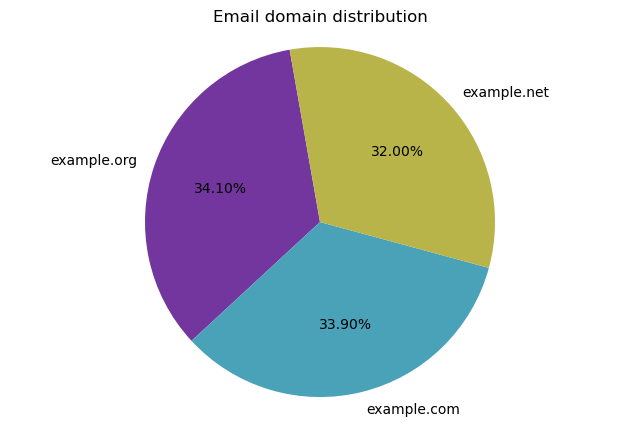

In [52]:
# Pie chart.
plt.figure(figsize=(8, 5))
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.2f%%',startangle=100, colors=custom_colors)
plt.title('Email domain distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()